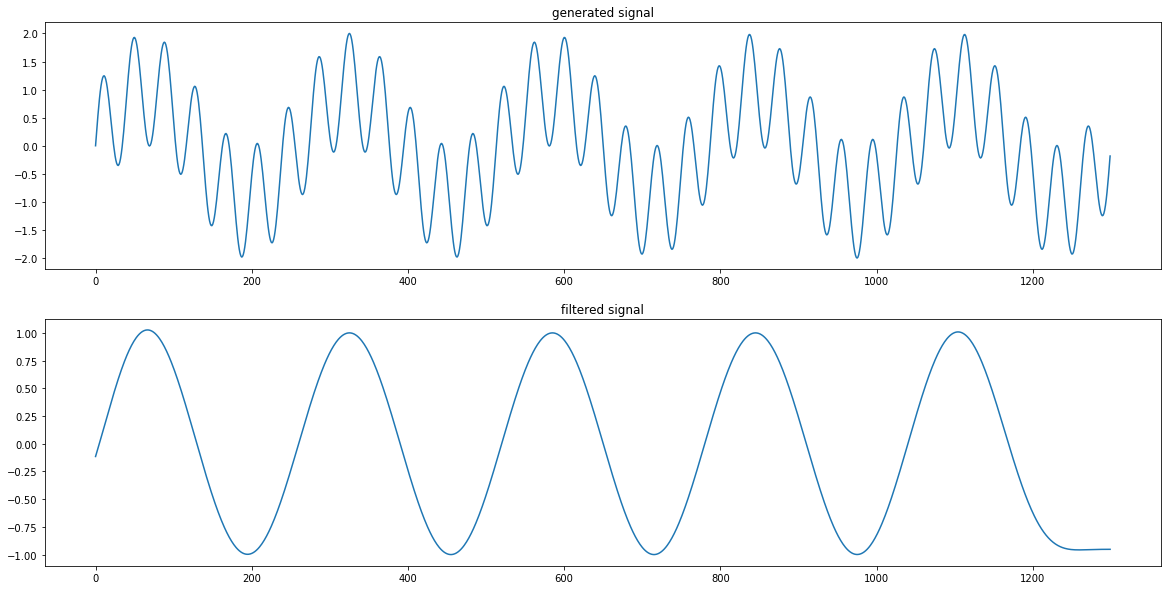

In [2]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt


def sine_generator(fs, sinefreq, duration):
    T = duration
    nsamples = fs * T
    w = 2. * np.pi * sinefreq
    t_sine = np.linspace(0, T, nsamples, endpoint=False)
    y_sine = np.sin(w * t_sine)
    result = pd.DataFrame({'data' : y_sine} ,index=t_sine)
    return result

def rand_generator(fs, duration):
    T = duration
    nsamples = fs * T
    t_val = np.linspace(0, T, nsamples, endpoint=False)
    y_val = np.random.uniform(size=nsamples)
    result = pd.DataFrame({'data' : y_val} ,index=t_val)
    return result

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y

fps = 1300
sine_fq = 33 #Hz
duration = 1 #seconds
sine_A = sine_generator(fps,sine_fq,duration)

sine_fq = 5 #Hz
sine_B = sine_generator(fps,sine_fq,duration)

randy  = rand_generator(fps, duration)

Wave = sine_A + sine_B;

Filtered = butter_highpass_filter(Wave.data,10,fps)
Filtered = butter_lowpass_filter(Wave.data,10,fps)

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(range(len(Wave)),Wave)
plt.title('generated signal')
plt.subplot(212)
plt.plot(range(len(Filtered)),Filtered)
plt.title('filtered signal')
plt.show()